In [2]:
#https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2
#https://www.unsaidtalks.com/first-machine-learning-project/
#we will be using this dataset to train our system which can predict the name of the fruit from input mass, width and height. This is called Supervised learning.

# Classification is a data mining task. It aims to extract knowledge from large datasets. There are two kinds of classification. The first one is known as complete classification, and it is applied to balanced datasets. However, when it is applied to imbalanced ones, it is called partial classification or a problem of classification in imbalanced datasets, which is a fundamental problem in machine learning. Classification can be done by several methods that are divided into two categories. The first category is based on the use of a model or a classifier such as decision trees and classification rules. However, the second category is based on the internal functioning of the learning algorithm such as neural networks [2] and support vector machines (SVMs). All these methods use large datasets to extract knowledge.

In [3]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
import numpy as np

In [4]:

fruits = pd.read_table(r'C:\Users\Simran Jakhodia\Downloads\fruit_data_with_colors.txt')
#fruits = pd.read_csv(url, sep=" " ,header=None)
# = pd.read_csv(url)

In [5]:
print(fruits)

    fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      apple          braeburn   172  

In [6]:
print(fruits.shape)

(59, 7)


In [7]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [8]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


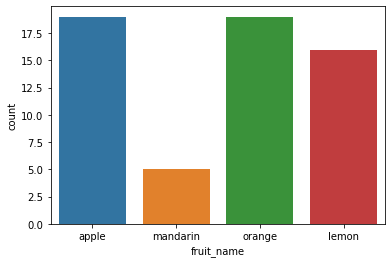

In [9]:
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
#plt.show()

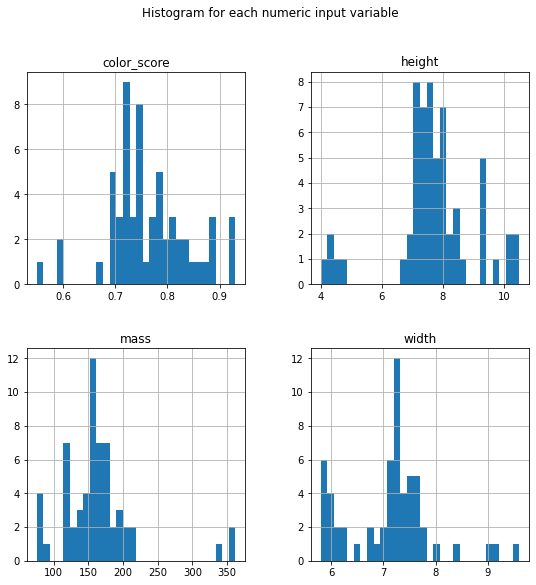

In [10]:
import pylab as plt
fruits.drop('fruit_label',axis=1).hist(bins=30,figsize=(9,9))
plt.suptitle("Histogram for each numeric input variable")
plt.savefig("fruits_hist")
plt.show()

In [11]:
print(fruits.describe())

       fruit_label        mass      width     height  color_score
count    59.000000   59.000000  59.000000  59.000000    59.000000
mean      2.542373  163.118644   7.105085   7.693220     0.762881
std       1.208048   55.018832   0.816938   1.361017     0.076857
min       1.000000   76.000000   5.800000   4.000000     0.550000
25%       1.000000  140.000000   6.600000   7.200000     0.720000
50%       3.000000  158.000000   7.200000   7.600000     0.750000
75%       4.000000  177.000000   7.500000   8.200000     0.810000
max       4.000000  362.000000   9.600000  10.500000     0.930000


# Create Training and Test Sets and apply scaling

In [12]:
from sklearn.model_selection import train_test_split
X = fruits[['mass','width','height']]
y = fruits['fruit_label']
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split data into Train and Test data. ‘X’ is input parameters using which prediction is to be made. ‘y’ is the output which is the prediction of fruit name. Following is the way to split the data into default 75%/25% Train-Test.

In [13]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train , y_train)
print('Accuracy of LR classifier on training set: {:.3f}'.format(logreg.score(X_train,y_train)))
print('Accuracy of LR classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of LR classifier on training set: 0.750
Accuracy of LR classifier on test set: 0.467


In [14]:
#Decision Tree
#Logistic Regression
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train , y_train)
print('Accuracy of DecisionTree classifier on training set: {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy of DecisionTree classifier on test set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of DecisionTree classifier on training set: 1.000
Accuracy of DecisionTree classifier on test set: 0.733


In [15]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train , y_train)
print('Accuracy of K Neighbors classifier on training set: {:.3f}'.format(knn.score(X_train,y_train)))
print('Accuracy of K Neighbors classifier on test set: {:.3f}'.format(knn.score(X_test, y_test)))

Accuracy of K Neighbors classifier on training set: 0.909
Accuracy of K Neighbors classifier on test set: 0.600


In [16]:
#The confusion matrix provides an indication of no error made on the test set.

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test , pred))
print(classification_report(y_test , pred))

[[1 0 3 0]
 [0 1 0 0]
 [3 0 5 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       0.25      0.25      0.25         4
           2       1.00      1.00      1.00         1
           3       0.62      0.62      0.62         8
           4       1.00      1.00      1.00         2

    accuracy                           0.60        15
   macro avg       0.72      0.72      0.72        15
weighted avg       0.60      0.60      0.60        15



In [18]:
#first example :a fruit mass 20g,width 4.3 cm , height 5.5cm

In [19]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
print(lookup_fruit_name)
fruit_prediction = knn.predict([[20,4.3,5.5]])
print(lookup_fruit_name[fruit_prediction[0]])

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}
orange


In [20]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm

In [21]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
print(lookup_fruit_name)
fruit_prediction = knn.predict([[100,6.3,8.5]])
print(lookup_fruit_name[fruit_prediction[0]])

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}
orange


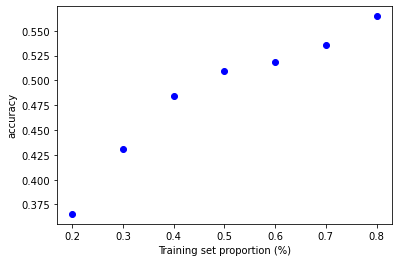

In [31]:
"""
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');
"""

([<matplotlib.axis.XTick at 0x20c60889a30>,
 <a list of 5 Text major ticklabel objects>)

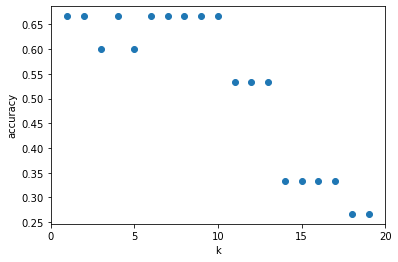

In [23]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [24]:
##Random forest classifier
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators =100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy of the Model: ",metrics.accuracy_score(y_test, y_pred))


Accuracy of the Model:  0.6666666666666666


In [25]:
clf.predict([[100,6.3,8.5]])

array([3], dtype=int64)

In [26]:
clf.predict([[20,4.3,5.5]])

array([3], dtype=int64)

In [32]:
#calculating feature importance using the feature importance variable


In [33]:
#feature_imp = pd.Series(clf.feature_importances_, index =fruits.fruit_name).sort_values(ascending = False)
#feature_imp